In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.datasets import fashion_mnist, cifar10, cifar100, mnist
from keras import Sequential
from keras.models import *
from keras.layers import *
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



2025-04-04 16:38:16.522751: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-04 16:38:17.894294: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-04 16:38:17.897353: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-04 16:38:33.212034: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load datasets and use k-fold

# Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# normalize data
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0          


## Inspección del dataset

📝 Ejercicio: 

Cambie el valor de **N** para obervar los distintos elementos del dataset

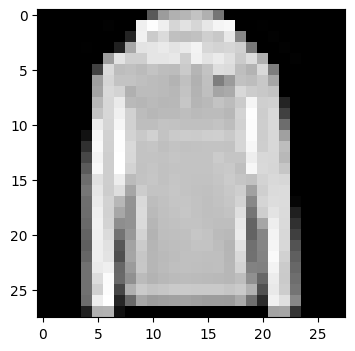

In [3]:
N = 24

# Tamaño de la imagen a mostrar
plt.figure(figsize=(4,4))

plt.imshow(x_train[N], cmap='gray')

## Arquitectura de la NN

In [41]:
# MLP architecture
w = 28
h = 28
n_classes = 10

model = Sequential([

    Flatten(input_shape=(w, h)),
    Dense(192, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_classes, activation='softmax')

])

# training params
lr = 0.01
op = SGD(lr)

model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 192)               150720    
                                                                 
 dense_33 (Dense)            (None, 128)               24704     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 128)               16512     
                                                                 
 dense_35 (Dense)            (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)              

## Training and eval

In [42]:
iter += 1

# training stage
history = model.fit(x_train_norm, y_train, epochs= 16, batch_size = 50, validation_split=0.2)

# evaluation stage
test_loss, test_acc = model.evaluate(x_test_norm, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

model.save('../models/mnistModel_FC_iter-' + str(iter) + '.h5')

Epoch 1/16


2025-04-04 18:11:01.708798: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


960/960 [==============================] - 11s 10ms/step - loss: 1.7331 - accuracy: 0.3492 - val_loss: 0.8991 - val_accuracy: 0.6512
Epoch 2/16
960/960 [==============================] - 9s 9ms/step - loss: 0.9257 - accuracy: 0.6410 - val_loss: 0.6869 - val_accuracy: 0.7318
Epoch 3/16
960/960 [==============================] - 6s 6ms/step - loss: 0.7466 - accuracy: 0.7189 - val_loss: 0.5658 - val_accuracy: 0.7993
Epoch 4/16
960/960 [==============================] - 5s 6ms/step - loss: 0.6598 - accuracy: 0.7555 - val_loss: 0.5119 - val_accuracy: 0.8049
Epoch 5/16
960/960 [==============================] - 7s 7ms/step - loss: 0.6029 - accuracy: 0.7794 - val_loss: 0.4789 - val_accuracy: 0.8270
Epoch 6/16
960/960 [==============================] - 6s 7ms/step - loss: 0.5675 - accuracy: 0.7962 - val_loss: 0.4649 - val_accuracy: 0.8315
Epoch 7/16
960/960 [==============================] - 6s 6ms/step - loss: 0.5304 - accuracy: 0.8111 - val_loss: 0.4293 - val_accuracy: 0.8441
Epoch 8/16
960/

## Metrics

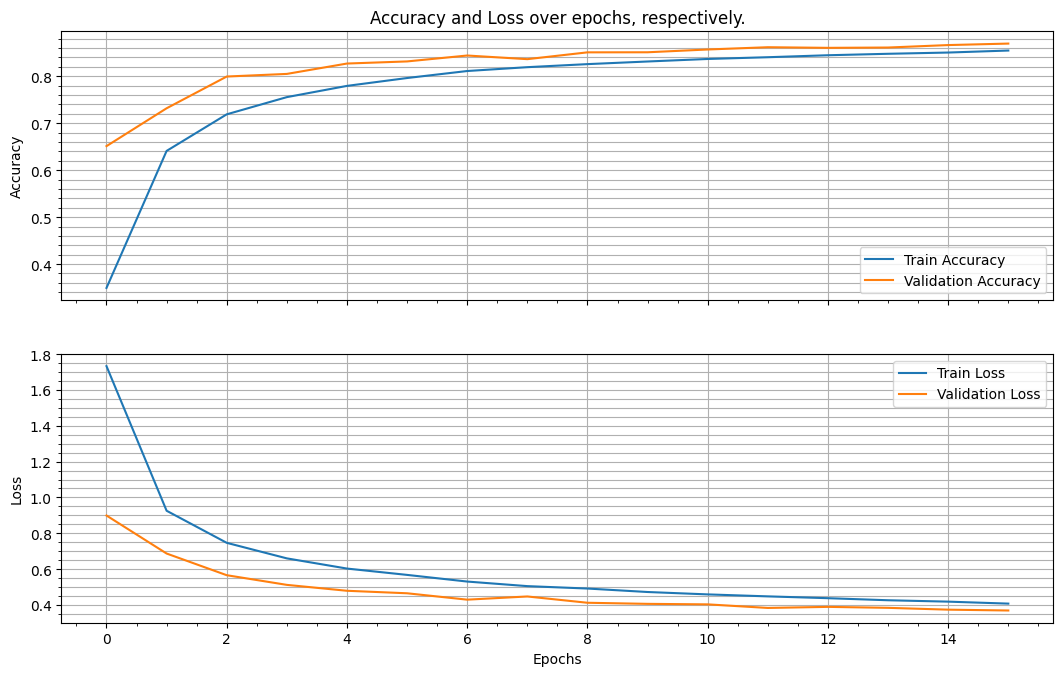

In [43]:
# Plot accuracy and loss over epochs
ax1 = plt.subplot(211)
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.minorticks_on()
ax1.tick_params('x', labelbottom=False)
ax1.grid(visible=True, which='both', axis='y')
ax1.grid(visible=True, which='Major', axis='x')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy and Loss over epochs, respectively.')
ax1.legend()

ax2 = plt.subplot(212)
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.minorticks_on()
ax2.grid(visible=True, which='both', axis='y')
ax2.grid(visible=True, which='Major', axis='x')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

fig = plt.gcf()
fig.set_size_inches(1280/fig.dpi, 768/fig.dpi)
plt.savefig("../img/acc_n_loss_iter-" + str(iter) + ".png", bbox_inches='tight')

plt.show()

### Confusion Matrix

313/313 [==============================] - 1s 2ms/step


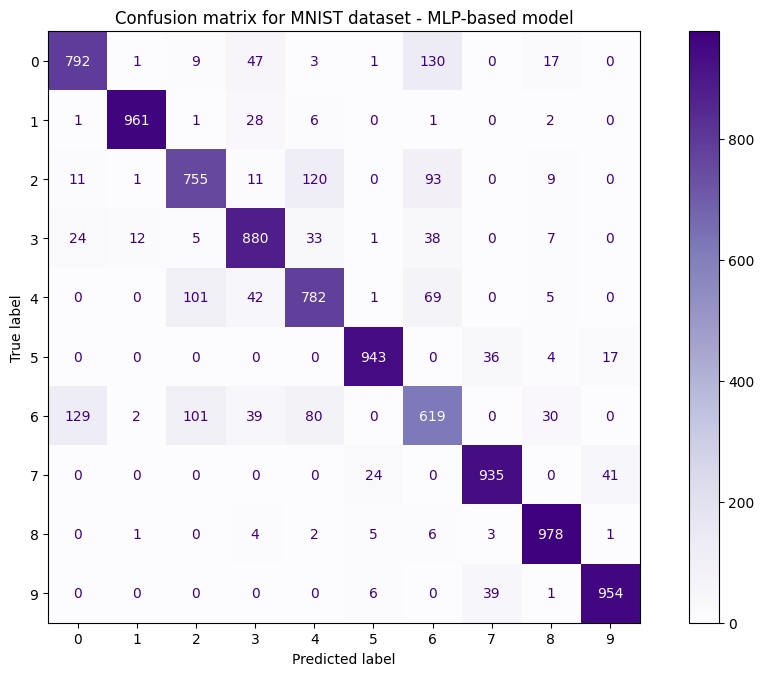

In [44]:
y_pred_probs = model.predict(x_test_norm)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = 'Purples')
plt.title('Confusion matrix for MNIST dataset - MLP-based model')

fig = plt.gcf()
fig.set_size_inches(1280/fig.dpi, 768/fig.dpi)
plt.savefig("../img/confusion_matrix_iter-" + str(iter) + ".png", bbox_inches='tight')

plt.show()

### ROC Curve

313/313 [==============================] - 1s 2ms/step


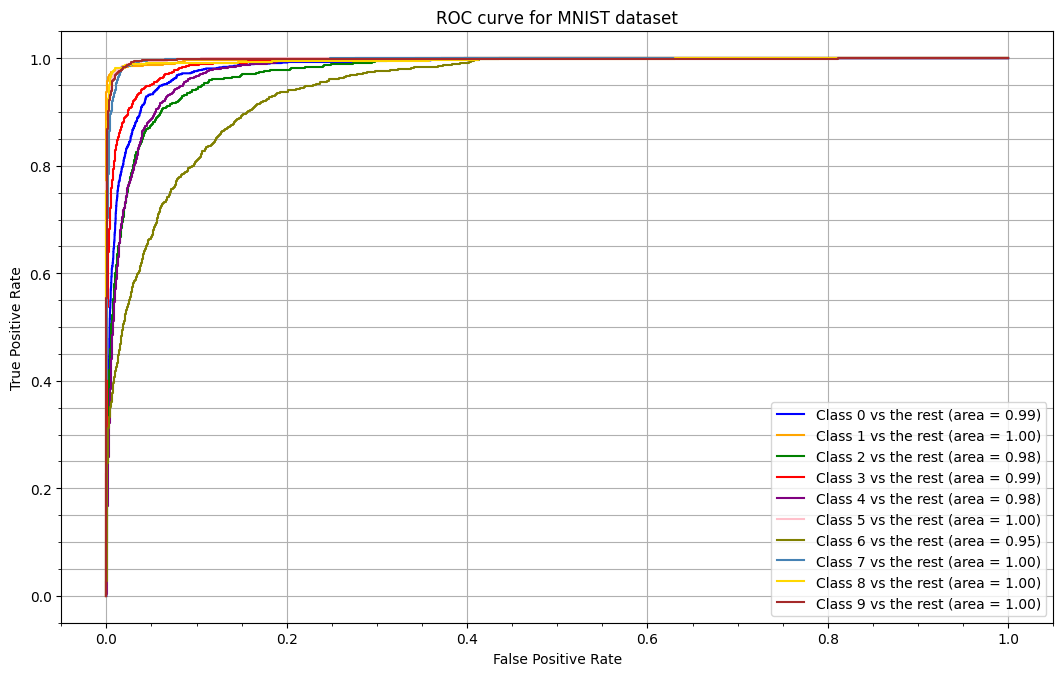

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
import matplotlib.colors as mcolors

y_pred = model.predict(x_test)

y_pred_labels = np.argmax(y_pred, axis=1)


# compute ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
  fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_probs[:,i], pos_label=i) 
  roc_auc[i] = auc(fpr[i], tpr[i])

## roc_auc_score require the y_test and y_pred array be in catecorical mode
ycat_test = keras.utils.to_categorical(y_test, 10)
ycat_test_pred = keras.utils.to_categorical(y_pred, 10)

# print(roc_auc_score(ycat_test, ycat_test_pred, multi_class='ovr', average='weighted'))

# Plot with for-loop
color = ['blue','orange', 'green', 'red', 'purple', 'pink', 'olive', 'steelblue', 'gold', 'brown' ]
plt.figure()
for g in range (10):
  plt.plot(fpr[g], tpr[g], color=color[g], label='Class %d vs the rest (area = %.2f)' % (g, roc_auc[g]))

# Plot by element
# plt.plot(fpr[0], tpr[0], color='blue', label='Class 0 vs the rest (area = %.2f)' % roc_auc[0])
# plt.plot(fpr[1], tpr[1], color='red', label='Class 1 vs the rest (area = %.2f)' % roc_auc[1])
# plt.plot(fpr[2], tpr[2], color='green', label='Class 2 vs the rest (area = %.2f)' % roc_auc[2])
# plt.plot(fpr[3], tpr[3], color='orange', label='Class 3 vs the rest (area = %.2f)' % roc_auc[3])

plt.title('ROC curve for MNIST dataset')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax = plt.gca()
ax.minorticks_on()
ax.grid(visible=True, which='both', axis='y')
ax.grid(visible=True, which='Major', axis='x')


fig = plt.gcf()
fig.set_size_inches(1280/fig.dpi, 768/fig.dpi)
plt.savefig("../img/ROC_iter-" + str(iter) + ".png", bbox_inches='tight')

plt.show()

####  📝 Ejercicio: 

Varíe el valor de batch, epoch, y learning rate. Obtenga las gráficas correspondientes. Qué conclusiones puede obtener al variar estos parámetros?

---
Iter 1->2 = Reducir epochs de 32 a 16 y aumentar learning rate x10:
- casi mismo desempeño, un poco mas de OF.

Iter 2->3 = Agregar dropout del 30% luego de la capa de 256 neuronas para evitar overfitting.
- reduce overfitting.

Iter 3->4 = Cambiar optim a adam.
- peor desempeño, quizas sea necesario reducir el learning rate.

Iter 4->5 = Cambiar optim a SGD nuevamente, aumentar profundidad de la red para ayudar con la clase "#6"

## Uso de One-Hot Encoding

El One-Hot Encoding es una técnica para convertir etiquetas categóricas en un formato numérico que las redes neuronales pueden procesar.

Por ejemplo, para MNIST, tenemos las clases 0, 1, 2, 3 ... hasta 9. En one-hot encoding estas se representan de la siguiente manera: 

0 -> [1, 0, 0, 0, ...]

1 -> [0, 1, 0, 0, ...]

2 -> [0, 0, 1, 0, ...]

3 -> [0, 0, 0, 1, ...]

y asi sucesivamente con todas las categorias presentes en el dataset. 


In [ ]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes = n_classes)
y_test = to_categorical(y_test, num_classes = n_classes)

# Uso de categorical_crossentropy loss 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# vuelvo a entrenar con one-hot encode
history = model.fit(x_train_norm, y_train, epochs= 16, validation_split=0.2)

# Plot accuracy and loss over epochs
ax1 = plt.subplot(211)
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.minorticks_on()
ax1.tick_params('x', labelbottom=False)
ax1.grid(visible=True, which='both', axis='y')
ax1.grid(visible=True, which='Major', axis='x')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy and Loss over epochs, respectively.')
ax1.legend()

ax2 = plt.subplot(212)
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.minorticks_on()
ax2.grid(visible=True, which='both', axis='y')
ax2.grid(visible=True, which='Major', axis='x')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

### CIFAR-10 para CNN

Vamos a repetir el procedimiento anterior pero haciendo uso de CIFAR-10 dataset. En este caso, vamos a emplear una arquitectura basada en 2D-CNN.

In [ ]:
from keras.datasets import fashion_mnist, cifar10, cifar100, mnist

# Carga del dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizacion del dataset
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 60s 0us/step


In [ ]:
# defino arquitectura de NN
model = Sequential([

    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)), 
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Reduce overfitting
    
    Dense(10, activation='softmax')
])

In [ ]:
# Compilar el modelo
op = Adam(0.001)
model.compile(optimizer=op,
              loss='sparse_categorical_crossentropy',   # Usar 'sparse_categorical_crossentropy' porque las etiquetas NO están one-hot encoded
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=32,  validation_split=0.2, batch_size=64)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


# Plot accuracy and loss over epochs
ax1 = plt.subplot(211)
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.minorticks_on()
ax1.tick_params('x', labelbottom=False)
ax1.grid(visible=True, which='both', axis='y')
ax1.grid(visible=True, which='Major', axis='x')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy and Loss over epochs, respectively.')
ax1.legend()

ax2 = plt.subplot(212)
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.minorticks_on()
ax2.grid(visible=True, which='both', axis='y')
ax2.grid(visible=True, which='Major', axis='x')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

### 📝 Ejercicios:

- Computar las métricas para CIFAR-10.

- Para MNIST, reemplazar la capa _Flatten_ en la definicion del modelo por _Dense_. Para este paso, la imagen se debe convertir en un vector de 1D. 

- Repetir el procedimiento anterior para fashion MNIST y CIFAR-100 datasets. 

- Obtener las métricas pertinentes para verificar el rendimiento del modelo.

- Para CIFAR-10 seleccione 2 clases e implemente un clasificador binario.
